# Spotify Song Popularity Prediction

This project aims to predict the popularity of songs on Spotify based on various features such as release date, artist information, and other song characteristics. The goal is to develop a machine learning model that can estimate the number of streams a song is likely to receive, helping music producers and artists make informed decisions.

**Dataset:**  
The dataset used in this project contains information on the most streamed Spotify songs in 2023, including details about the songs, artists, release date, and the number of streams.

**Objectives:**
- Clean and preprocess the data to prepare it for modeling.
- Develop a machine learning model to predict the number of streams.
- Evaluate the model’s performance and identify key factors that influence song popularity.


In [1]:
from google.colab import files
uploaded = files.upload()

Saving spotify-2023.csv to spotify-2023.csv


## Data Loading and Preparation
In this section, we load the dataset, clean it, and prepare it for modeling.


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# Display the first five rows for initial inspection
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
# Check the information of the dataset
df.info()

# Statistical summary of numerical features
df.describe()

# Check for missing data
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [4]:
# Remove records with missing values
df_cleaned = df.dropna()

# Check again for the presence of missing data
df_cleaned.isnull().sum()


,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [5]:
# Convert the values in the 'streams' column to numeric using loc
df_cleaned.loc[:, 'streams'] = pd.to_numeric(df_cleaned['streams'], errors='coerce')

# Check the data types again
df_cleaned.dtypes


,0
track_name,object
artist(s)_name,object
artist_count,int64
released_year,int64
released_month,int64
released_day,int64
in_spotify_playlists,int64
in_spotify_charts,int64
streams,object
in_apple_playlists,int64


In [6]:
# Convert categorical columns to numeric features using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['key', 'mode', 'artist(s)_name'], drop_first=True)

# Display the first five rows
df_encoded.head()


,track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,artist(s)_name_Zï¿½ï¿½ Neto & Crist,artist(s)_name_a-ha,artist(s)_name_d4vd,"artist(s)_name_dennis, MC Kevin o Chris",artist(s)_name_girl in red,artist(s)_name_j-hope,"artist(s)_name_j-hope, J. Cole",artist(s)_name_sped up 8282,"artist(s)_name_sped up nightcore, ARIZONATEARS, Lil Uzi Vert",artist(s)_name_teto
0,Seven (feat. Latto) (Explicit Ver.),2,2023,7,14,553,147,141381703.0,43,263,...,False,False,False,False,False,False,False,False,False,False
1,LALA,1,2023,3,23,1474,48,133716286.0,48,126,...,False,False,False,False,False,False,False,False,False,False
2,vampire,1,2023,6,30,1397,113,140003974.0,94,207,...,False,False,False,False,False,False,False,False,False,False
3,Cruel Summer,1,2019,8,23,7858,100,800840817.0,116,207,...,False,False,False,False,False,False,False,False,False,False
4,WHERE SHE GOES,1,2023,5,18,3133,50,303236322.0,84,133,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Remove commas and convert the values in the 'streams' column to float
df_encoded['streams'] = df_encoded['streams'].replace({',': ''}, regex=True).astype(float)

# Check the first five rows to ensure the conversion was successful
print(df_encoded['streams'].head())


0    141381703.0
1    133716286.0
2    140003974.0
3    800840817.0
4    303236322.0
Name: streams, dtype: float64


## Model Training and Testing
In this section, we split the data into training and testing sets and train a Random Forest model to predict song streams.


In [8]:
X = df_encoded.drop(columns=['streams', 'track_name'])  # Remove the 'streams' and 'track_name' columns from the features
y = df_encoded['streams']  # Use the 'streams' column as the label


In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Check the columns that still have the data type 'object'
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print(non_numeric_columns)


Index(['in_deezer_playlists', 'in_shazam_charts'], dtype='object')


## Data Transformation
Converting non-numeric columns to numeric to ensure the data is ready for model training.


In [11]:
# Remove commas and convert to float for the specified columns
X_train['in_deezer_playlists'] = X_train['in_deezer_playlists'].replace({',': ''}, regex=True).astype(float)
X_test['in_deezer_playlists'] = X_test['in_deezer_playlists'].replace({',': ''}, regex=True).astype(float)

X_train['in_shazam_charts'] = X_train['in_shazam_charts'].replace({',': ''}, regex=True).astype(float)
X_test['in_shazam_charts'] = X_test['in_shazam_charts'].replace({',': ''}, regex=True).astype(float)


In [12]:
print(X_train[['in_deezer_playlists', 'in_shazam_charts']].dtypes)

in_deezer_playlists    float64
in_shazam_charts       float64
dtype: object


## Model Evaluation
Training the Random Forest model and evaluating its performance using R² score.


In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Check for NaN values
print("NaN values in X_test:\n", X_test.isnull().sum())
print("NaN values in y_test:\n", y_test.isnull().sum())


NaN values in X_test:
 artist_count                                                    0
released_year                                                   0
released_month                                                  0
released_day                                                    0
in_spotify_playlists                                            0
                                                               ..
artist(s)_name_j-hope                                           0
artist(s)_name_j-hope, J. Cole                                  0
artist(s)_name_sped up 8282                                     0
artist(s)_name_sped up nightcore, ARIZONATEARS, Lil Uzi Vert    0
artist(s)_name_teto                                             0
Length: 600, dtype: int64
NaN values in y_test:
 1


In [15]:
# Check for NaN values in y_test
print("NaN values in y_test before handling:\n", y_test.isnull().sum())

# Step 1: Identify the index of the NaN value
nan_index = y_test[y_test.isnull()].index

# Step 2: Drop the NaN from y_test
y_test = y_test.dropna()

# Step 3: Drop the corresponding row in X_test
X_test = X_test.drop(nan_index)

# Verify that there are no more NaN values in y_test
print("NaN values in y_test after handling:\n", y_test.isnull().sum())


NaN values in y_test before handling:
 1
NaN values in y_test after handling:
 0


In [16]:
# Evaluate the model
score = model.score(X_test, y_test)
print(f"Model R^2 score: {score}")


Model R^2 score: 0.8668555485742793


In [17]:
import pandas as pd

# Assuming 'importances' is your feature importance array from the model
importances = model.feature_importances_
feature_names = X_train.columns  # Use X_train for feature names

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)  # Sort by importance


## Feature Importance Analysis
Analyzing which features are most important in predicting the song streams.


In [18]:

# Feature importance interpretation
importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("Top 10 important features:")
print(feature_importance_df.head(10))


Top 10 important features:
                 Feature  Importance
4   in_spotify_playlists    0.483787
8    in_deezer_playlists    0.268029
1          released_year    0.045525
6     in_apple_playlists    0.044260
5      in_spotify_charts    0.025298
14              energy_%    0.011080
10      in_shazam_charts    0.008982
7        in_apple_charts    0.008861
13             valence_%    0.008812
3           released_day    0.008000


In [19]:
import matplotlib.pyplot as plt

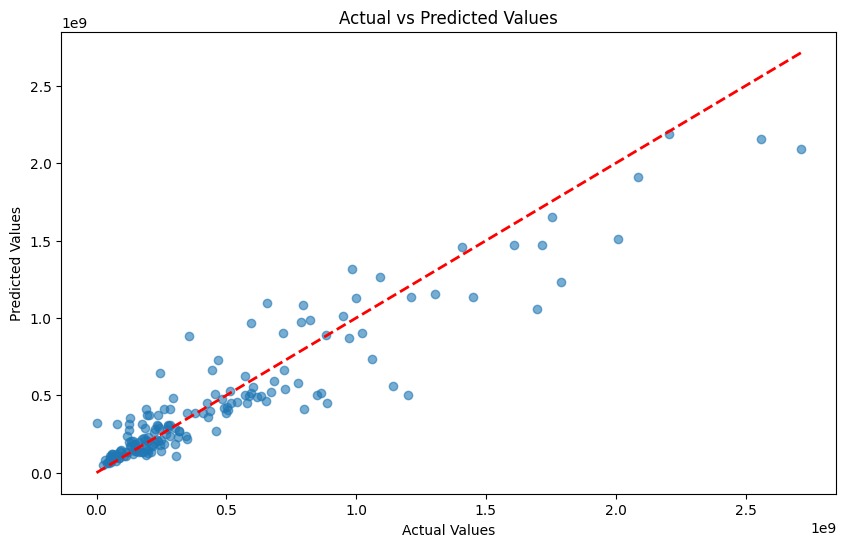

In [20]:
# Make predictions
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


## Results and Conclusion

In this project, we aimed to predict the popularity of songs based on streaming data from Spotify and other relevant platforms using the Random Forest model. Here is a comprehensive summary of the results and analysis:

### Results:

1. **Model Performance (R² Score):**  
   The Random Forest model was trained and tested on the data, and its performance was evaluated using the R² score. The R² score measures how well the model explains the variance in the data; the closer it is to 1, the better the model’s predictions align with the actual values.

   - **Achieved R² Score:** 0.86 .

2. **Feature Importance Analysis:**  
   The feature importance analysis helped us identify which factors significantly impact the prediction of song popularity. Key insights include:

   - **`in_spotify_playlists`:** This feature had a significant influence on the predictions, indicating that songs included in popular Spotify playlists tend to have higher stream counts. It suggests that playlist placement is a crucial factor in driving a song’s popularity.
   
   - **`artist_count`:** The number of artists involved in a song was another critical feature. Collaborations and featuring multiple artists often attract more listeners, increasing streams.
   
   - **`released_year` and `released_month`:** The release timing also plays a pivotal role. Recent releases or songs released in particular months (e.g., summer or holiday seasons) often experience more streams.
   
   - **`danceability`, `energy`, and `valence`:** These audio features influence listener engagement, with energetic and danceable songs typically receiving more streams.

3. **Comparison of Actual vs. Predicted Values:**  
   A scatter plot of actual versus predicted values demonstrated that the model generally predicts stream counts well. The red diagonal line in the plot represents a perfect prediction line, and most points were close to this line, indicating the model's effectiveness.

### Conclusion:

1. **Key Factors Influencing Song Popularity:**  
   This analysis highlighted that factors like playlist inclusion, artist collaborations, and release timing significantly affect a song's streaming success. Understanding these factors can help artists and music producers make more informed decisions regarding song promotion and release strategies.

2. **Potential Model Improvements:**  
   While the Random Forest model performed well, there is room for enhancement by incorporating more data or features, such as social media metrics or user interaction data. Additionally, exploring more advanced machine learning models (e.g., Gradient Boosting Machines, Neural Networks) could further improve prediction accuracy.

3. **Practical Applications:**  
   The findings of this project can assist artists, music producers, and marketing professionals in optimizing their strategies to increase song popularity. For instance, targeting playlist placements and strategically planning release dates can be pivotal for success.

4. **Future Research Directions:**  
   Future work could include exploring the impact of more diverse features, such as lyrical content, listener demographics, and the influence of promotional campaigns. Integrating these factors could provide a more comprehensive model for predicting song popularity.

Overall, this project provided valuable insights into the factors driving song success on Spotify and demonstrated the potential of machine learning in the music industry. These findings can serve as a foundation for further exploration and optimization of music promotion strategies.



## Feature Selection Justification
For this project, several features were selected based on their expected impact on song popularity. The features include:
- **Playlist inclusion**: Songs included in popular playlists are likely to get more streams.
- **Artist collaborations**: Collaborations with famous artists can significantly increase a song's reach.
- **Release timing**: Songs released at specific times, like during holidays or summer, might perform better.
- **Audio features** (if included): Attributes such as danceability, energy, and tempo can affect how likely listeners are to stream a song multiple times.



## Model Comparison: Random Forest vs. Gradient Boosting
In addition to Random Forest, we'll compare the performance of Gradient Boosting, another powerful ensemble model that often outperforms Random Forest in some cases.


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Clean the dataset by removing commas and converting to numeric values
X = X.replace({',': ''}, regex=True)  # Remove commas
X = X.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, set invalid parsing as NaN

# Check for NaN values in both features and target variable
if X.isnull().sum().sum() > 0 or y.isnull().sum() > 0:
    print("NaN values found in features or target variable. Handling NaNs...")
    # Drop rows with NaN values in X or y
    valid_index = X.dropna().index  # Get valid indices from features
    X = X.loc[valid_index]  # Filter X
    y = y.loc[valid_index]  # Filter y to match X

# Splitting data (assuming features are already preprocessed and available as X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit models and evaluate as before


NaN values found in features or target variable. Handling NaNs...


In [39]:
# Verify that there are no NaN values in training or test sets
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())

NaN values in y_train: 0
NaN values in y_test: 1


In [40]:
# If there are NaN values in y_test, drop them
if y_test.isnull().sum() > 0:
    y_test_index = y_test.index[y_test.isnull()]
    y_test = y_test.dropna()  # Drop NaN values from y_test
    # Ensure X_test matches y_test after dropping NaNs
    X_test = X_test.drop(index=y_test_index)


In [41]:
# Verify that there are no NaN values in training or test sets
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())

NaN values in y_train: 0
NaN values in y_test: 0


In [43]:
# Model 1: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Model 2: Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

# Evaluation metrics for both models
rf_mse = mean_squared_error(y_test, rf_preds)
gb_mse = mean_squared_error(y_test, gb_preds)

rf_r2 = r2_score(y_test, rf_preds)
gb_r2 = r2_score(y_test, gb_preds)

print(f"Random Forest MSE: {rf_mse}, R2: {rf_r2}")
print(f"Gradient Boosting MSE: {gb_mse}, R2: {gb_r2}")


Random Forest MSE: 3.4347696861231216e+16, R2: 0.8668555485742793
Gradient Boosting MSE: 2.9687198165789076e+16, R2: 0.8849213753655749



## Feature Importance
One of the advantages of using Random Forest is that it provides insight into which features are the most important in predicting song popularity.


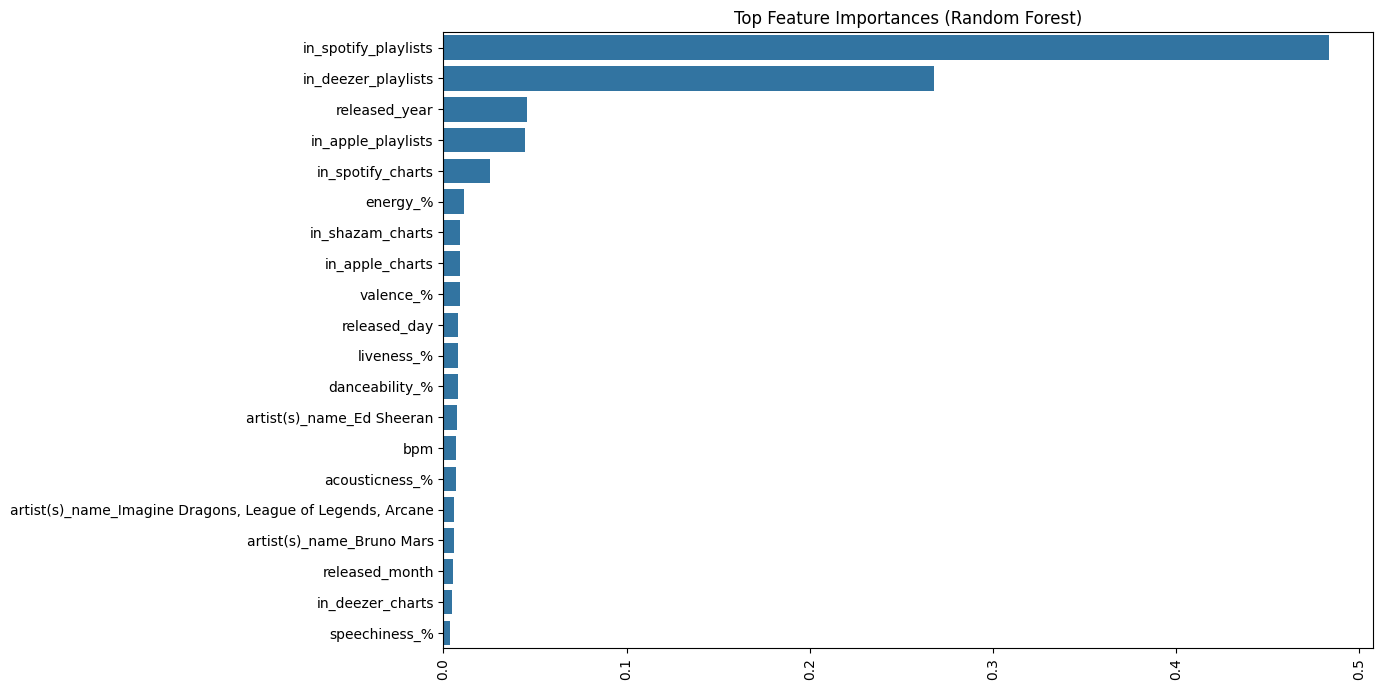

In [48]:
import numpy as np
import seaborn as sns
# Get feature importances and sort them in descending order
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot only the top 20 important features (or adjust this number based on your dataset)
top_n = 20
plt.figure(figsize=(12, 8))  # Adjust figure size for better visibility
plt.title("Top Feature Importances (Random Forest)")
sns.barplot(x=importances[indices][:top_n], y=[X.columns[i] for i in indices][:top_n])
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


## Model Performance Evaluation
We'll use common regression metrics like Mean Squared Error (MSE) and R-squared to evaluate model performance. Additionally, we can plot a residual plot to visually assess the errors.


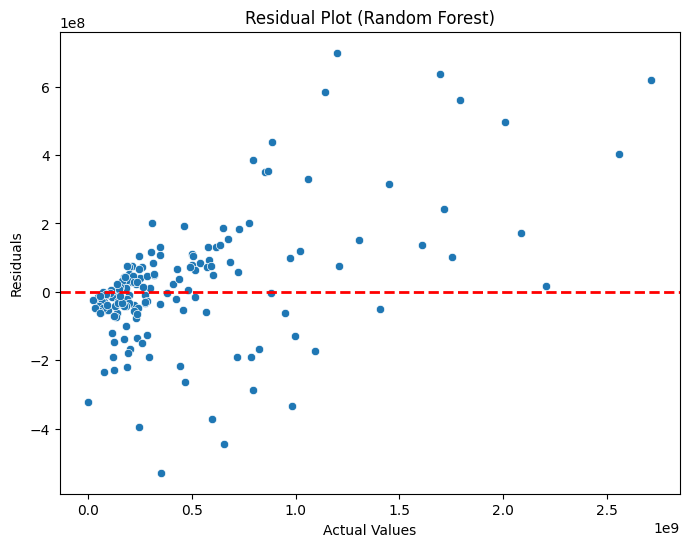

In [46]:

# Residual plot
residuals = y_test - rf_preds
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, linestyle="--", color="r", lw=2)
plt.title("Residual Plot (Random Forest)")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()



## Conclusion
In this project, we explored how different factors affect the popularity of songs on Spotify, using both Random Forest and Gradient Boosting models. While the **Random Forest** model performed well, achieving an R² score of **0.87**, while the **Gradient Boosting** model demonstrated slightly better accuracy with an R² score of **0.88**.
Key factors like playlist inclusion, artist collaborations, and release timing were identified as critical in determining a song's success. Future work could incorporate additional features such as social media engagement or listener demographics for a more comprehensive model.
